# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Voy a importar los archivos como DataFrames, llamar al método info(), revisar los tipos de datos, las columnas, valores ausentes y observar que cambios son prioritarios.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# importar librerías

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
df_products = pd.read_csv('/datasets/products.csv', sep = ';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv('/datasets/departments.csv', sep = ';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')# leer conjuntos de datos en los DataFrames

In [3]:
print(df_orders.info())
print(df_orders.head(5))


# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

In [4]:
print(df_products.info())
print(df_products.head(5))# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             1

In [5]:
print(df_aisles.info())
print(df_aisles.head(5))# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
print(df_order_products.info())
print(df_order_products.head(5))# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones


Las columnas al utilizar delimitadores diferentes a las comas se reconocen como una sola.
Hay algunos valores que son flotantes y es mejor procesarlos como enteros.
Encontramos valores ausentes y seguramente habrá algún duplicado.

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Voy a buscar valores duplicados y ausentes, y dependiendo del caso eliminarlos o manejarlos de manera diferente.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [7]:
print(df_orders.duplicated().sum()) #encontrar los duplicados

duplicated_orders = df_orders[df_orders.duplicated()] #filtrarlos

print(duplicated_orders)#mostrarlos para analizarlos


15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay 15 líneas duplicadas, todos fueron pedidos de un miércoles a las 2 a.m.

In [8]:
filtered_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(filtered_orders)
print(filtered_orders.count())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
De las 121 filas en total, 15 son exactamente iguales a otras.

In [9]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(inplace=True)

In [10]:
print(df_orders.duplicated().sum())# Vuelve a verificar si hay filas duplicadas


0


In [11]:
print(df_orders['order_id'].duplicated().sum())# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Encontré que existían 15 valores duplicados, todos tenían en común una hora y un día específicos.
Fueron eliminados utilizando el método drop_duplicates.

### `products` data frame

In [12]:
print(df_products.duplicated().sum())# Verifica si hay filas totalmente duplicadas


0


In [13]:
print(df_products['department_id'].duplicated().sum())

print(df_products[df_products['department_id'].duplicated()])# Revisa únicamente si hay ID de departamentos duplicados


49673
       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4         

In [14]:
df_products['product_name'] = df_products['product_name'].str.upper()

print(df_products['product_name'].duplicated().sum())

duplicated_products_names = df_products[df_products['product_name'].duplicated()]

print(duplicated_products_names)


# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


1361
       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71         

In [15]:
df_products.dropna(subset=['product_name']).duplicated().sum()# Revisa si hay nombres duplicados de productos no faltantes


0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los duplicados en 'department_id' son esperados, toda vez que varios productos pueden pertenecer a un mismo departamento.

Todos los duplicados en 'product name' son debido a valores faltantes en los nombres de los productos.

### `departments` data frame

In [16]:
print(df_departments.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [17]:
print(df_departments['department_id'].duplicated().sum())# Revisa únicamente si hay IDs duplicadas de productos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay ningún valor duplicado en este Data Frame.

### `aisles` data frame

In [18]:
print(df_aisles.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [19]:
print(df_aisles['aisle_id'].duplicated().sum())# Revisa únicamente si hay IDs duplicadas de productos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores duplicados en este DataFrame.

### `order_products` data frame

In [20]:
print(df_order_products.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [21]:

print(df_order_products.duplicated(subset=['order_id', 'product_id']).sum())
# Vuelve a verificar si hay cualquier otro duplicado engañoso


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No existen duplicados en el Data Frame.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [22]:
print(df_products['product_name'].isna().sum())




1258


Describe brevemente cuáles son tus hallazgos.

Existen algunos valores ausentes en la columna 'product_names'

In [23]:
print(((df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)).sum())#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


1258


Describe brevemente cuáles son tus hallazgos.

Todos los valores ausentes se relacionan con el pasillo 100.

In [24]:
print(((df_products['product_name'].isna()) & (df_products['department_id'] == 21)).sum())# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


1258


Describe brevemente cuáles son tus hallazgos.

Todos los valores ausentes están relacionados con el pasillo 100 y el departamento 21.

In [25]:
print(df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)])# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Definitivamente todos los valores ausentes pertenecen al pasillo 100 y al departamento 21.

In [26]:
df_products['product_name'].fillna('Unknown', inplace= True)
print(df_products['product_name'].isna().sum())# Completa los nombres de productos ausentes con 'Unknown'


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los valores ausentes están relacionados con las filas cuyo valor está establecido como 'Missing', por lo que están contempladas, no deben eliminarse, solo sustituirse para que sean tomadas en cuenta para nuestro análisis.

### `orders` data frame

In [27]:
print(df_orders.isna().sum())# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [28]:
print(((df_orders['order_number'] != 1) & df_orders['days_since_prior_order'].isna()).sum())# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores ausentes que no correspondan al primer pedido del cliente.

### `order_products` data frame

In [29]:
print(df_order_products.isna().sum())# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [30]:
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())# ¿Cuáles son los valores mínimos y máximos en esta columna?


1.0
64.0


Describe brevemente cuáles son tus hallazgos.
Hay 836 valores ausentes en la columna 'add_to_cart_order', donde el mínimo es 1, y el máximo es 64.

In [31]:
order_id_filtrado = df_order_products.loc[df_order_products['add_to_cart_order'].isnull(), 'order_id']# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

print(order_id_filtrado)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [32]:
agrupados_por_pedido = df_order_products[df_order_products['order_id'].isin(order_id_filtrado)].groupby('order_id')# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

conteo_por_pedido = agrupados_por_pedido['product_id'].count()# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

print(conteo_por_pedido.min())# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


65


Describe brevemente cuáles son tus hallazgos.

En efecto, todos los valores ausentes pertenecen a ordenes con más de 64 productos, por lo que al parecer, al sobrepasar los 64, se cuentan como valores nulos.

In [33]:
df_order_products['add_to_cart_order'].fillna('999', inplace = True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products['add_to_cart_order'].isna().sum())# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
print()
print(df_order_products['add_to_cart_order'].head())

0

0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Parece ser que el sistema solo reconoce hasta los 64 productos, como no sabe que hacer con el excedente, al sobrepasar los 64 productos los datos se convertían en nulos, por lo que se sustituyeron por un valor genérico pero que fuera convertible a 'int'.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos.

Encontré que los dataframes tenían valores duplicados y ausentes, por lo que había que procesarlos.
Ahora están listos para ser analizados y comenzar a plantear hipótesis.



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
print(df_orders['order_hour_of_day'].min())
print(df_orders['order_hour_of_day'].max())

0
23


In [35]:
print(df_orders['order_dow'].min())
print(df_orders['order_dow'].max())

0
6


Escribe aquí tus conclusiones

Todos los valores están dentro del rango.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Número de personas que realizan pedidos cada hora'}, xlabel='Hora del día', ylabel='Número de personas'>

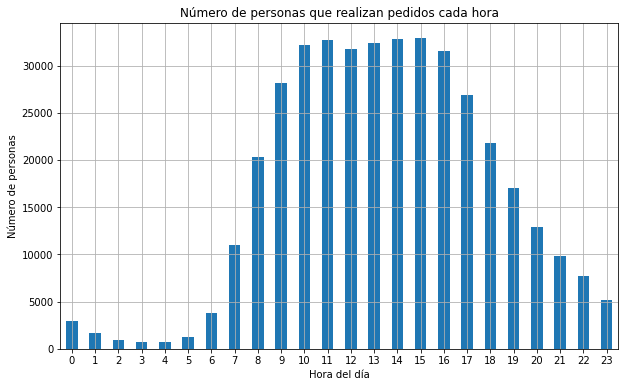

In [36]:
ordenes_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

ordenes_por_hora.plot(x='order_hour_of_day', kind='bar', title='Número de personas que realizan pedidos cada hora', grid=True, xlabel='Hora del día', ylabel='Número de personas', rot=0, legend=False, figsize=(10, 6))

Escribe aquí tus conclusiones

Las horas con más pedidos abarcan de las 10 a las 16 hrs, los horarios de desayuno o comida, normalmente.
En la madrugada no se realizan muchos pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Número de personas que realizan pedidos por día'}, xlabel='Día de la semana', ylabel='Número de personas'>

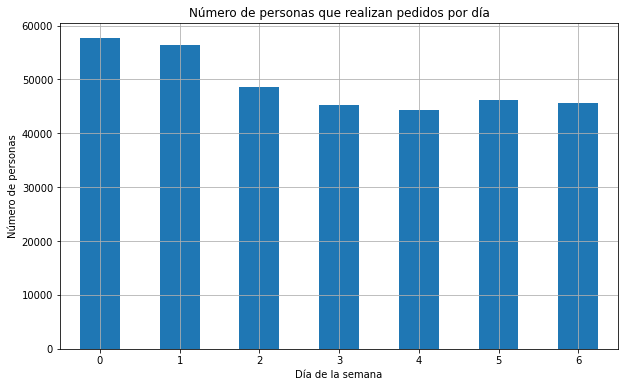

In [37]:
ordenes_por_dia = df_orders.groupby('order_dow')['user_id'].nunique()
ordenes_por_dia.plot(x='order_dow', kind='bar', title='Número de personas que realizan pedidos por día', grid=True, xlabel='Día de la semana', ylabel='Número de personas', rot=0, legend=False, figsize=(10, 6))

Escribe aquí tus conclusiones

Los domingos son los días en que más se hacen pedidos, en contraste con los jueves, donde los pedidos son notoriamente menores.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

0.0
30.0


array([[<AxesSubplot:title={'center':'days_since_prior_order'}>]],
      dtype=object)

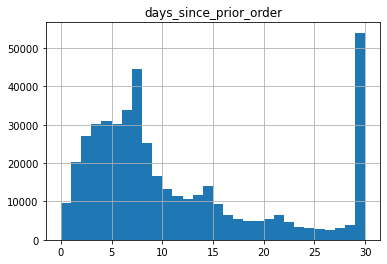

In [38]:
print(df_orders['days_since_prior_order'].min())
print(df_orders['days_since_prior_order'].max())
df_orders.hist(column='days_since_prior_order', bins= 30)

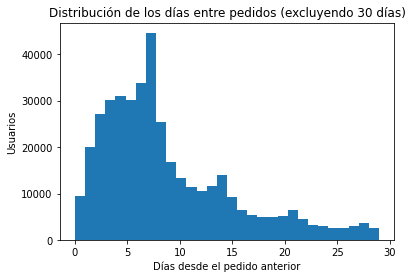

In [39]:
dias_sin_30 = df_orders[df_orders['days_since_prior_order'] != 30]

plt.hist(dias_sin_30['days_since_prior_order'], bins=30)
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Usuarios')
plt.title('Distribución de los días entre pedidos (excluyendo 30 días)')
plt.show()

Escribe aquí tus conclusiones
Evidentemente, al observar la gráfica sin considerar a aquellos clientes que, o bien, no realizan un segundo pedido, o tardan más de 30 días en hacerlo, podemos apreciar claramente que la gran mayoría de clientes realiza sus pedidos de nuevo entre 5 y 10 días después. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
pedidos_miercoles = df_orders[df_orders['order_dow'] == 3]
pedidos_sabado = df_orders[df_orders['order_dow'] == 6]

In [41]:
distribucion_miercoles = pedidos_miercoles['order_hour_of_day'].value_counts().sort_index()
distribucion_sabado = pedidos_sabado['order_hour_of_day'].value_counts().sort_index()

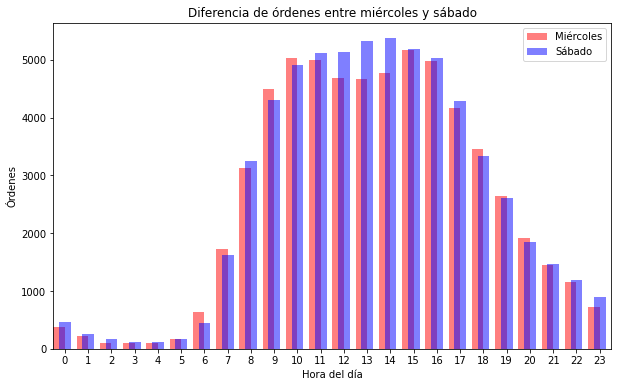

In [42]:
distribucion_miercoles.plot(title = 'Diferencia de órdenes entre miércoles y sábado', kind='bar', color='r', alpha=0.5, position=1, figsize = [10, 6])
distribucion_sabado.plot(kind='bar', color='b', alpha=0.5, rot=0, ylabel = 'Órdenes', xlabel= 'Hora del día')
plt.legend(['Miércoles', 'Sábado'])

Escribe aquí tus conclusiones
Podemos apreciar que los sábados se realizan más pedidos que los miércoles entre las 11 y las 14 horas, existiendo la mayor diferencia a las 13hrs. Pero también hay momentos donde los miércoles son ligeramente superiores, como a las 9 y 10 horas.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

1
28


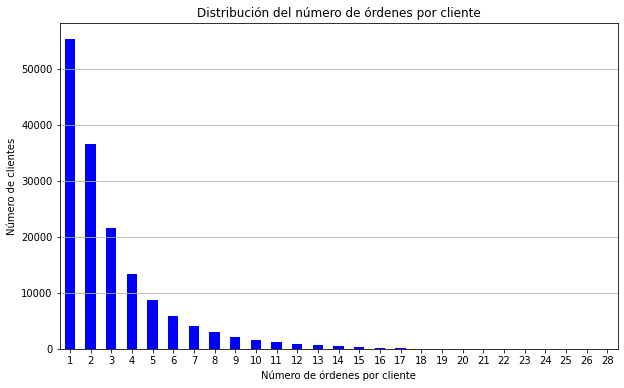

In [43]:
ordenes_por_cliente = df_orders['user_id'].value_counts()
print(df_orders['user_id'].value_counts().min())
print(df_orders['user_id'].value_counts().max())
# Contar cuántos clientes hicieron x número de órdenes
distribucion_ordenes = ordenes_por_cliente.value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(10, 6))
distribucion_ordenes.plot(kind='bar', color='blue')
plt.xlabel('Número de órdenes por cliente')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de órdenes por cliente')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones. La gran mayoría de los clientes realizan un solo pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [59]:
df_merged = df_order_products.merge(df_products, on='product_id')
populares = df_merged.groupby(['product_id', 'product_name']).size()
populares = populares.sort_values(ascending=False)
top_populares = populares.head(20)
top_populares

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
dtype: int64

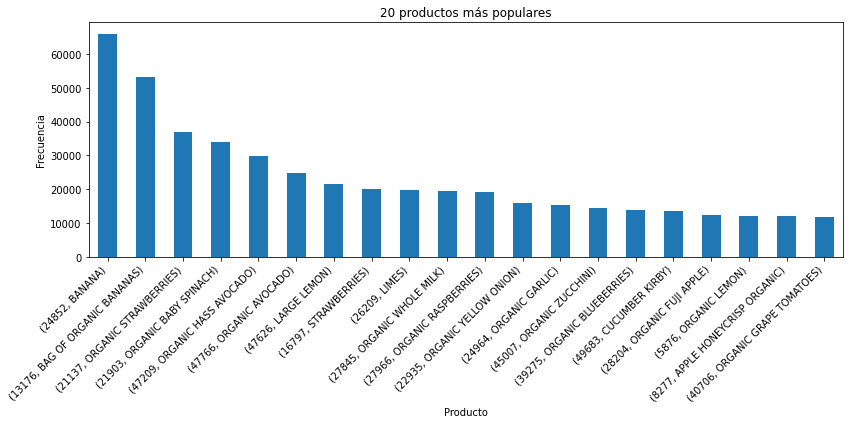

In [60]:
top_populares.plot(kind='bar', figsize=(12, 6))
plt.title('20 productos más populares')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones. Los productos más populares son todos de origen natural, en su mayoría frutas y verduras, siendo el plátano número uno y dos, en diferentes presentaciones.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

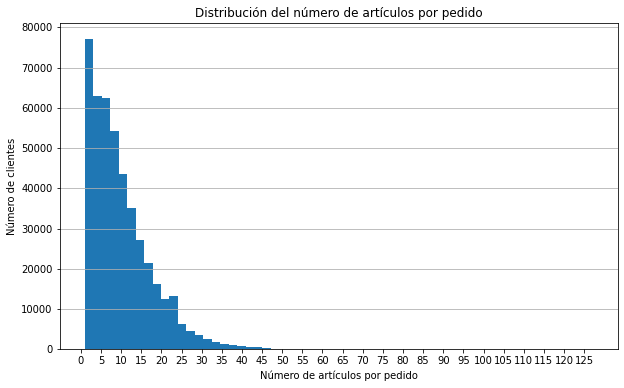

In [46]:
promedio_articulos_por_pedido = df_order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=(10, 6))
promedio_articulos_por_pedido.plot(kind= 'hist', bins=60)
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de artículos por pedido')
plt.grid(axis='y')
plt.xticks(range(0, promedio_articulos_por_pedido.max() + 1, 5))
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones.
La gran mayoría de clientes reliza menos de 5 productos por pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
reordenados = df_order_products[df_order_products['reordered'] == 1]

In [48]:
reordenados_id = reordenados['product_id'].value_counts(ascending=False).head(20)

In [49]:
reordenados_lista = reordenados_id.tolist()

reordenados_final = df_products[df_products['product_id'].isin(reordenados_lista)]
                                  
print(reordenados_final[['product_id', 'product_name']])

       product_id                                       product_name
8388         8389    8.1 OZ. WHEAT THIN TOASTED CHIPS ROASTED GARLIC
8411         8412                           GREEN PEAS NO SALT ADDED
8798         8799                           1ST FOODS SWEET POTATOES
8835         8836                                   JALAPENO CASHEWS
8988         8989                      OLIVE OIL & BALSAMIC DRESSING
9537         9538                       INSTANT LUNCH CHICKEN FLAVOR
10075       10076                              CHUNK LIGHT YELLOWFIN
10410       10411                                   CAULIFLOWER HEAD
11144       11145                 UNBLEACHED WHITE FINE PASTRY FLOUR
13326       13327                       100% COLOMBIAN MEDIUM COFFEE
13944       13945                        2 IN 1 WHITENING TOOTHPASTE
14747       14748    SOFT WHITE 200 WATTS GENERAL PURPOSE LIGHT BULB
15043       15044                             QUARK SEA SALT CARAMEL
16250       16251                 

Escribe aquí tus conclusiones
Los productos más reordenados son muy variados, desde frituras (el producto más popular), hasta focos, aceite y pasta de dientes.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [50]:
proporcion_reordered = df_order_products.groupby('product_id')['reordered'].mean()
proporcion_reordered

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64

Text(0.5, 0, 'Proporción de reorden')

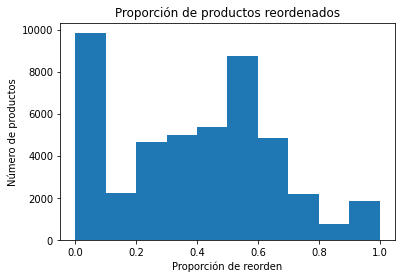

In [51]:
proporcion_reordered.plot(kind='hist', title= 'Proporción de productos reordenados')
plt.ylabel('Número de productos')
plt.xlabel('Proporción de reorden')

Escribe aquí tus conclusiones.
Podemos apreciar que la mayoría de productos no son reordenados, o rondan el 50%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [52]:
df_merged = pd.merge(df_order_products, df_orders, on='order_id')

proporcion_reordenar_por_usuario = df_merged.groupby('user_id')['reordered'].mean()

print(proporcion_reordenar_por_usuario)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


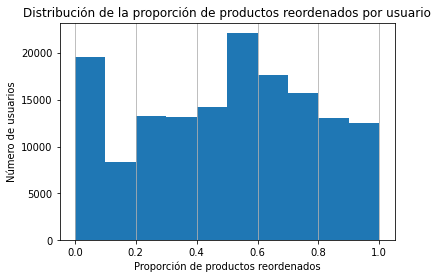

In [53]:
proporcion_reordenar_por_usuario.hist()
plt.xlabel('Proporción de productos reordenados')
plt.ylabel('Número de usuarios')
plt.title('Distribución de la proporción de productos reordenados por usuario')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones.
La mayoría de usuarios reordena alrededor del 50% de sus productos, seguidos por aquellos que no reordenan nunca.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [72]:
df_merged = pd.merge(df_products, df_order_products, on='product_id')

df_first_in_cart = df_merged[df_merged['add_to_cart_order'] == 1]

top_products = df_first_in_cart.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)

top_products



product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

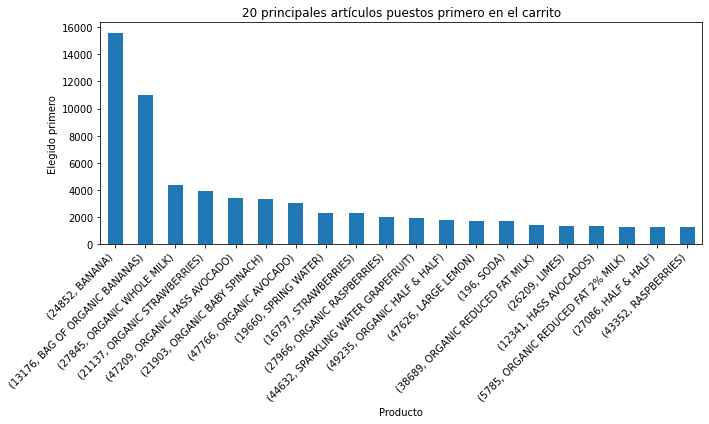

In [73]:
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('20 principales artículos puestos primero en el carrito')
plt.xlabel('Producto')
plt.ylabel('Elegido primero')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones.
Podemos apreciar que los productos más populares son también los primeros en ser agregados al carrito, siendo 'BANANAS' el producto más popular, tanto por número de pedidos como por ser agregado primero al carrito.

### Conclusion general del proyecto:

Me pareció un proyecto muy desafiante, me costó mucho resolverlo, pero al final lo logré y me siento algo asustado pero preparado para los desafíos profesionales que vienen.
Podemos apreciar claramente que el producto más popular y más agregado al carrito es 'BANANA', que los días sábado alrededor del medio día son aquellos con mayor cantidad de pedidos, que los productos más reordenados son básicos del hogar, pero no existe una tendencia (relativa a la categoría o tipo de productos) que más se reordenan, existe un pocentaje cercano al 50% de que la mayoría de las personas reordene un producto.